# FEATURE ENGINEERING(OUTLIER_HANDLING) 

## Outlier detecting

Outlier can be detected using various techniques and Plots:
1) Z-score        
2) IQR       
3) Boxplot         
4) Scatterplot         
5) Violinplot             

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\P nageswararao\OneDrive\Desktop\google_outliers.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.00,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.00,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.00,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,136881.75,25.0,12498500.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.00,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018.0


In [4]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
count,10840.000000,10840.000000,10840.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.223132,35249.487546,20.588363,2.641346e+06,1.027368,15.609041,6.422325,2017.490314
std,0.417134,53078.429554,19.935750,4.289582e+06,15.949703,9.561621,2.578388,0.825821
min,3.250000,0.000000,0.010000,0.000000e+00,0.000000,1.000000,1.000000,2015.500000
25%,4.000000,38.000000,4.800000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,4.300000,2094.000000,13.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,54775.500000,30.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,136881.750000,67.800000,1.249850e+07,400.000000,31.000000,12.000000,2018.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 1.3+ MB


### Using Z-score

<AxesSubplot:>

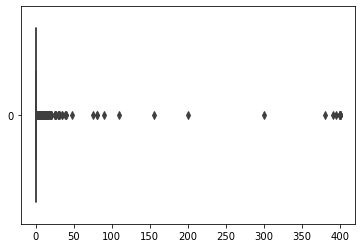

In [43]:
sns.boxplot(data=df['Price'],orient="h")

In [30]:
m = df['Price'].mean()
std  =  df['Price'].std()

In [32]:
df['zscore'] = (df.Price - m) / std

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,zscore
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.00,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018.0,-0.064413
1,Coloring book moana,ART_AND_DESIGN,3.9,967.00,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018.0,-0.064413
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.00,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018.0,-0.064413
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,136881.75,25.0,12498500.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018.0,-0.064413
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.00,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018.0,-0.064413


In [29]:
df['zscore']

0       -0.064413
1       -0.064413
2       -0.064413
3       -0.064413
4       -0.064413
           ...   
10835   -0.064413
10836   -0.064413
10837   -0.064413
10838   -0.064413
10839   -0.064413
Name: zscore, Length: 10840, dtype: float64

In [34]:
m

1.027368081180801

In [35]:
std

15.949703469381058

In [38]:
np.mean(df.Price)

1.027368081180801

In [37]:
np.std(df.Price)

15.948967764983916

10840

In [3]:
import requests
import json

In [4]:
response = requests.get(url=f"http://127.0.0.1:8000/data/record/")
data = response.text

In [5]:
df= pd.read_json(data)

In [6]:
df

,id,user,category,amount,date,description,status,reaction
0,1,siva@gmail.com,Insurance,45402,2022-02-03 20:21:40+00:00,Burmese black mountain tortoise,Gifted,Sad
1,2,siva@gmail.com,Health,17628,2022-10-01 09:08:26+00:00,"Weaver, sociable",Paid,Humanity
2,3,siva@gmail.com,Health,1246,2021-11-20 19:13:35+00:00,Defassa waterbuck,Credited,Smile
3,4,siva@gmail.com,Education,2987,2022-05-16 07:19:45+00:00,"Macaw, blue and gold",Paid,Sad
4,5,siva@gmail.com,Travel,96522,2022-08-05 13:28:48+00:00,"Capuchin, white-fronted",Gifted,Smile
...,...,...,...,...,...,...,...,...
95,96,sampath@gmail.com,Travel,79348,2022-03-21 13:56:04+00:00,Roseat flamingo,Paid,Sad
96,97,siva@gmail.com,Banking,8157,2022-04-05 23:09:25+00:00,Long-nosed bandicoot,Gifted,Excitement
97,98,sampath@gmail.com,Health,50829,2022-07-02 16:03:40+00:00,"Mongoose, javan gold-spotted",Gifted,Smile
98,99,siva@gmail.com,Stores,81979,2021-12-20 12:35:30+00:00,Caracal,Credited,Smile


In [13]:
def chart():
    import matplotlib.pyplot as plt

    colors = ['#DFFF00', '#FFBF00', '#FF7F50','#DE3163', '#9FE2BF','#40E0D0','#6495ED','#CCCCFF','#AF7AC5']
    explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05)
    plt.pie(df.groupby('category')['amount'].sum(), colors=colors, labels=label,autopct='%1.1f%%', pctdistance=0.80,explode=explode)
    centre_circle = plt.Circle((0, 0), 0.60, fc='black',animated=True,visible=True)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('Report')
    plt.show()



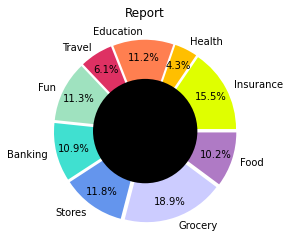

In [14]:
chart()

In [9]:
label=list(df.category.unique())

In [16]:
import plotly as pt
import plotly.express as px

In [26]:
px.pie(df,values=df.groupby('category')['amount'].sum(),names=label,hole=0.6)

In [22]:
label.sort()

In [23]:
label

['Banking',
 'Education',
 'Food',
 'Fun',
 'Grocery',
 'Health',
 'Insurance',
 'Stores',
 'Travel']